In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from libs.Dataset import create_triplet_csv, remove_unnamed_col, split_train_val_test, TripletTrashbinDataModule
from os.path import join 

class_dict = {
    0: 'empty',
    1: 'half',
    2: 'full'
}

dm_img_size = 224

Adatto il dataset originale in triplette

In [2]:
create_triplet_csv(dest_csv_path=join("dataset", "all_labels_triplet.csv"))

Dataset dimension: empty: 4400 half: 4400 full: 4400


100%|██████████| 13200/13200 [06:04<00:00, 36.25it/s]


Verifico che il dataset contenga gli elementi corretti, mostrandone alcuni randomicamente

In [2]:
dst_triplet_df = pd.read_csv(join('dataset', 'all_labels_triplet.csv'))

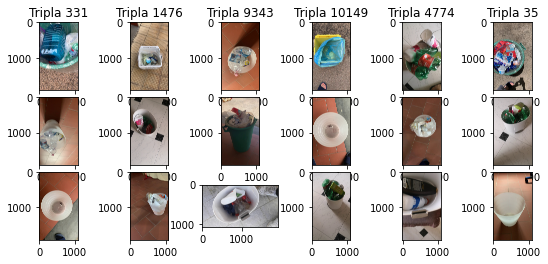

In [7]:
plt.figure(figsize=(16,4))
for i, idx in enumerate(np.random.choice(len(dst_triplet_df), 6)):
    ax = plt.subplot(3,10,i+1)
    ax.set_title('Tripla {}'.format(idx))
    
    plt.subplot(3,10,i+1)
    plt.imshow(plt.imread(dst_triplet_df['anchor_image'][i]),cmap='gray')

    plt.subplot(3,10,i+11)
    plt.imshow(plt.imread(dst_triplet_df['pos_image'][i]),cmap='gray')

    plt.subplot(3,10,i+21)
    plt.imshow(plt.imread(dst_triplet_df['neg_image'][i]),cmap='gray')

plt.subplots_adjust(hspace=0.1)
plt.show()

Divido il dataset in 3 file `.csv` utilizzando `split_train_val_test` di `sklearn`

In [5]:
training_df, validation_df, test_df = split_train_val_test(dataset=dst_triplet_df, perc=[0.5, 0.2, 0.3])

training_df = remove_unnamed_col(training_df)
validation_df = remove_unnamed_col(validation_df)
test_df = remove_unnamed_col(test_df)

training_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

training_df.to_csv('dataset/triplet_training.csv')
validation_df.to_csv('dataset/triplet_validation.csv')
test_df.to_csv('dataset/triplet_test.csv')

Utilizzo il `DataModule`per caricare il dataset

In [3]:
dm = TripletTrashbinDataModule(img_size=dm_img_size)

dm.prepare_data()
dm.setup()

Do nothing on prepare_data


Visualizzo il dataset su `DataFrame`

In [4]:
dm.train_dataloader().dataset.data

,anchor_image,anchor_label,pos_image,pos_label,neg_image,neg_label
0,dataset/images/trashbin_12974.jpg,2.0,dataset/images/trashbin_11647.jpg,2.0,dataset/images/trashbin_8807.jpg,1.0
1,dataset/images/trashbin_8833.jpg,1.0,dataset/images/trashbin_1721.jpg,1.0,dataset/images/trashbin_2072.jpg,2.0
2,dataset/images/trashbin_6310.jpg,0.0,dataset/images/trashbin_10838.jpg,0.0,dataset/images/trashbin_11344.jpg,1.0
3,dataset/images/trashbin_6234.jpg,0.0,dataset/images/trashbin_5107.jpg,0.0,dataset/images/trashbin_2284.jpg,2.0
4,dataset/images/trashbin_10748.jpg,2.0,dataset/images/trashbin_2103.jpg,2.0,dataset/images/trashbin_9974.jpg,0.0
...,...,...,...,...,...,...
6595,dataset/images/trashbin_4840.jpg,0.0,dataset/images/trashbin_4807.jpg,0.0,dataset/images/trashbin_800.jpg,2.0
6596,dataset/images/trashbin_4695.jpg,2.0,dataset/images/trashbin_3519.jpg,2.0,dataset/images/trashbin_552.jpg,1.0
6597,dataset/images/trashbin_8916.jpg,1.0,dataset/images/trashbin_11205.jpg,1.0,dataset/images/trashbin_12071.jpg,0.0
6598,dataset/images/trashbin_6063.jpg,0.0,dataset/images/trashbin_2653.jpg,0.0,dataset/images/trashbin_11859.jpg,2.0


Visualizzo 6 triplette randomiche dal Dataloader

/var/folders/xc/1c23sj2s5h7d869ldsyfkyk40000gn/T/ipykernel_13756/735194441.py:6: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2318.)
  plt.imshow(dm.trb_train[i][0].T)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow wi

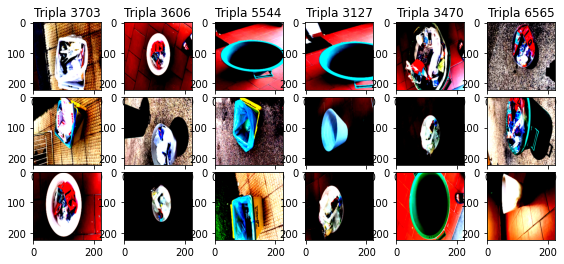

In [5]:
plt.figure(figsize=(16,4))
for i, idx in enumerate(np.random.choice(len(dm.trb_train), 6)):
    ax = plt.subplot(3,10,i+1)
    ax.set_title('Tripla {}'.format(idx))
    
    plt.imshow(dm.trb_train[i][0].T)
    plt.subplot(3,10,i+11)
    # plt.title('Class: {}'.format(dm.trb_train[i][3]))
    plt.imshow(dm.trb_train[i][2].T)
    # plt.title('Class: {}'.format(dm.trb_train[i][4]))
    plt.subplot(3,10,i+21)
    plt.imshow(dm.trb_train[i][4].T)
    # plt.title('Class: {}'.format(dm.trb_train[i][5]))

plt.subplots_adjust(hspace=0.1)
plt.show()